# Feature Selection

In [25]:
import warnings

import pandas as pd
import numpy as np

df_path = 'C:\imbalance_forecast\data\df_nord.csv'
df_nord = pd.read_csv(df_path, index_col=0, parse_dates=True)

# Check for duplicate timestamps in the index
duplicates = df_nord.index.duplicated(keep=False)  # True for duplicates
duplicate_timestamps = df_nord[duplicates]

# Remove duplicates by keeping the first occurrence
df_nord = df_nord[~df_nord.index.duplicated(keep='first')]

df_nord

<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_7488\1532803225.py:6: SyntaxWarning: invalid escape sequence '\i'
  df_path = 'C:\imbalance_forecast\data\df_nord.csv'


,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,FRANCE_MWQH,SLOVENIA_MWQH,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-47.312,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11776.405,12085.191
2019-01-01 00:15:00,-30.343,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11723.369,12010.132
2019-01-01 00:30:00,-20.311,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11771.133,11984.692
2019-01-01 00:45:00,-13.934,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11740.606,11935.066
2019-01-01 01:00:00,-65.080,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.5,292.0,235.1475,2741.11600,2086.04475,224.06475,297.123,11559.374,11825.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN
2024-10-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN
2024-10-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN


In [26]:
lags = [-x for x in range(1, 6)]
lags.extend([-x for x in range(94, 97)])

# Create a new DataFrame with SBIL_MWH and its lagged values
df_sbil_lagged = pd.DataFrame(df_nord['SBIL_MWH'])

# Add lagged columns
for lag in lags:
    df_sbil_lagged[f'SBIL_MWH_lag{abs(lag)}'] = df_sbil_lagged['SBIL_MWH'].shift(-lag)

# Drop rows with NaN values due to shifting
df_sbil_lagged.dropna(inplace=True)

# Display the resulting DataFrame
df_sbil_lagged.head()

,SBIL_MWH,SBIL_MWH_lag1,SBIL_MWH_lag2,SBIL_MWH_lag3,SBIL_MWH_lag4,SBIL_MWH_lag5,SBIL_MWH_lag94,SBIL_MWH_lag95,SBIL_MWH_lag96
ORAINI,,,,,,,,,
2019-01-02 00:00:00,38.978,-20.445,-79.663,-136.583,-196.821,69.012,-20.311,-30.343,-47.312
2019-01-02 00:15:00,56.932,38.978,-20.445,-79.663,-136.583,-196.821,-13.934,-20.311,-30.343
2019-01-02 00:30:00,122.707,56.932,38.978,-20.445,-79.663,-136.583,-65.080,-13.934,-20.311
2019-01-02 00:45:00,174.893,122.707,56.932,38.978,-20.445,-79.663,-20.155,-65.080,-13.934
2019-01-02 01:00:00,99.216,174.893,122.707,56.932,38.978,-20.445,-26.199,-20.155,-65.080


In [27]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_sbil_lagged.columns if feature != TARGET]

df_sbil_lagged = df_sbil_lagged.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_sbil_lagged[FEATURES], df_sbil_lagged[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


RandomForestRegressor(max_depth=7, n_estimators=250, n_jobs=-1, verbose=True)

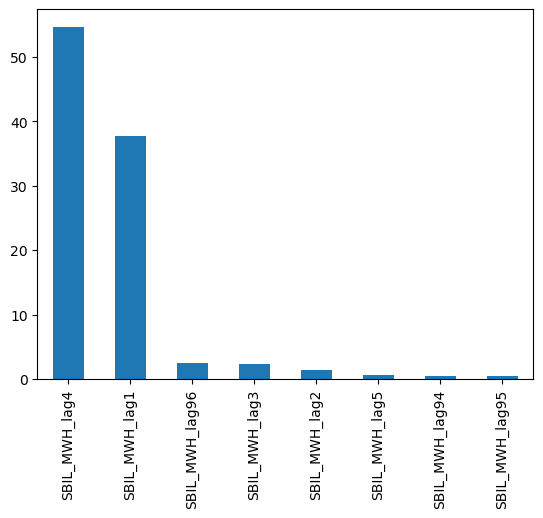

In [28]:
import matplotlib.pyplot as plt
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()

# Hourly Imbalance

In [6]:
import sys
print(sys.path)
import os
import pandas as pd
import numpy as np

# Add the source directory to the system path
sys.path.append(os.path.abspath('../src'))
from open_data import fetch_db_table_sqlserver16
import matplotlib.pyplot as plt

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SEGNO_QH" 
qh = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
qh = qh.sort_values(by='ORAINI')

# Filter the DataFrame for the relevant columns and rows
qh = qh[['MACROZONA', 'ORAINI', 'SBIL_MWH']]
# Convert ORAINI to datetime using the correct method
qh['ORAINI'] = pd.to_datetime(qh['ORAINI'], format='%Y%m%d%H%M')
qh.set_index('ORAINI', inplace=True)
# Nord
qh_nord = qh[qh['MACROZONA'] == 'NORD']
# Sud
qh_sud = qh[qh['MACROZONA'] == 'SUD']

# Resample to hourly data and take the sum of 'SBIL_MWH' for each hour
h_nord = qh_nord.resample('H').sum()

# Clean the 'MACROZONA' column to retain only 'NORD'
h_nord['MACROZONA'] = h_nord['MACROZONA'].str[:4]

['c:\\Users\\samueledelia\\.conda\\envs\\myenv\\python312.zip', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\DLLs', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv', '', 'C:\\Users\\samueledelia\\AppData\\Roaming\\Python\\Python312\\site-packages', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\win32', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\setuptools\\_vendor', 'c:\\src', 'c:\\src', 'c:\\imbalance_forecast\\src']


c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)
C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_12956\751685697.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  h_nord = qh_nord.resample('H').sum()


In [10]:
lags = [-x for x in range(1, 7)]
lags.extend([23, 24, 25, 47, 48, 72, 96])

# Create a new DataFrame with SBIL_MWH and its lagged values
df_sbil_lagged = h_nord

# Add lagged columns
for lag in lags:
    df_sbil_lagged[f'SBIL_MWH_lag{abs(lag)}'] = df_sbil_lagged['SBIL_MWH'].shift(-lag)

# Drop rows with NaN values due to shifting
df_sbil_lagged.dropna(inplace=True)

df_sbil_lagged = df_sbil_lagged.drop(columns="MACROZONA")
# Display the resulting DataFrame
df_sbil_lagged.head()

,SBIL_MWH,SBIL_MWH_lag1,SBIL_MWH_lag2,SBIL_MWH_lag3,SBIL_MWH_lag4,SBIL_MWH_lag5,SBIL_MWH_lag6,SBIL_MWH_lag23,SBIL_MWH_lag24,SBIL_MWH_lag25,SBIL_MWH_lag47,SBIL_MWH_lag48,SBIL_MWH_lag72,SBIL_MWH_lag96
ORAINI,,,,,,,,,,,,,,
2019-01-01 18:00:00,254.947,292.258,493.791,523.572,487.442,349.984,465.825,-126.152,-23.670,-131.462,34.307,-46.027,-362.399,-455.985
2019-01-01 19:00:00,25.884,254.947,292.258,493.791,523.572,487.442,349.984,-23.670,-131.462,-6.976,-46.027,-215.532,-449.657,-282.306
2019-01-01 20:00:00,-33.517,25.884,254.947,292.258,493.791,523.572,487.442,-131.462,-6.976,59.962,-215.532,-139.667,-403.534,-167.489
2019-01-01 21:00:00,-109.453,-33.517,25.884,254.947,292.258,493.791,523.572,-6.976,59.962,74.840,-139.667,-145.177,-277.632,-229.026
2019-01-01 22:00:00,-2.372,-109.453,-33.517,25.884,254.947,292.258,493.791,59.962,74.840,-139.764,-145.177,-13.612,-331.226,-232.067


In [11]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_sbil_lagged.columns if feature != TARGET]

df_sbil_lagged = df_sbil_lagged.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_sbil_lagged[FEATURES], df_sbil_lagged[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   38.7s finished


RandomForestRegressor(max_depth=7, n_estimators=250, n_jobs=-1, verbose=True)

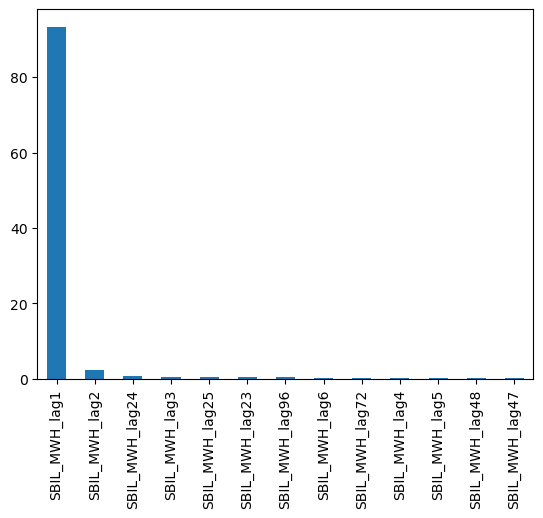

In [12]:
import matplotlib.pyplot as plt
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()